# Problems
Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically  estimate the variance).

## Hoeffding inequality

Let $X_1, ..., X_n$ be i.i.d. random variables, bounded by the intervals $a_i \leq X_i \leq b_i$. Let the empirical mean be defined according to $\overline{X} = \frac{1}{n} \sum_{i=1}^n X_i$. It holds that: $$ P(|\overline{X} - \mathbb{E}[\overline{X}]| \geq \epsilon) \leq 2e^{-\frac{2n\epsilon^2}{\sum_{i=1}^n(a_i - b_i)^2}} $$

To find the Confidence Interval (CI) with confidence level $1 - \alpha$ (e.g., 0.95 for 95%), we set the right side equal to $\alpha$ and solve for the margin of error $\epsilon$:

$$ \epsilon = (b-a)\sqrt(\frac{\ln{2/\alpha}}{2N})$$

## Chebishev inequality

For any R.V (Random Variable)  $X$ and for *any*  positive number $\lambda > 0$: $$ Pr(|X-\mathbb{E}[X]| \geq \lambda) \leq \frac{Var(X)}{\lambda^2} $$

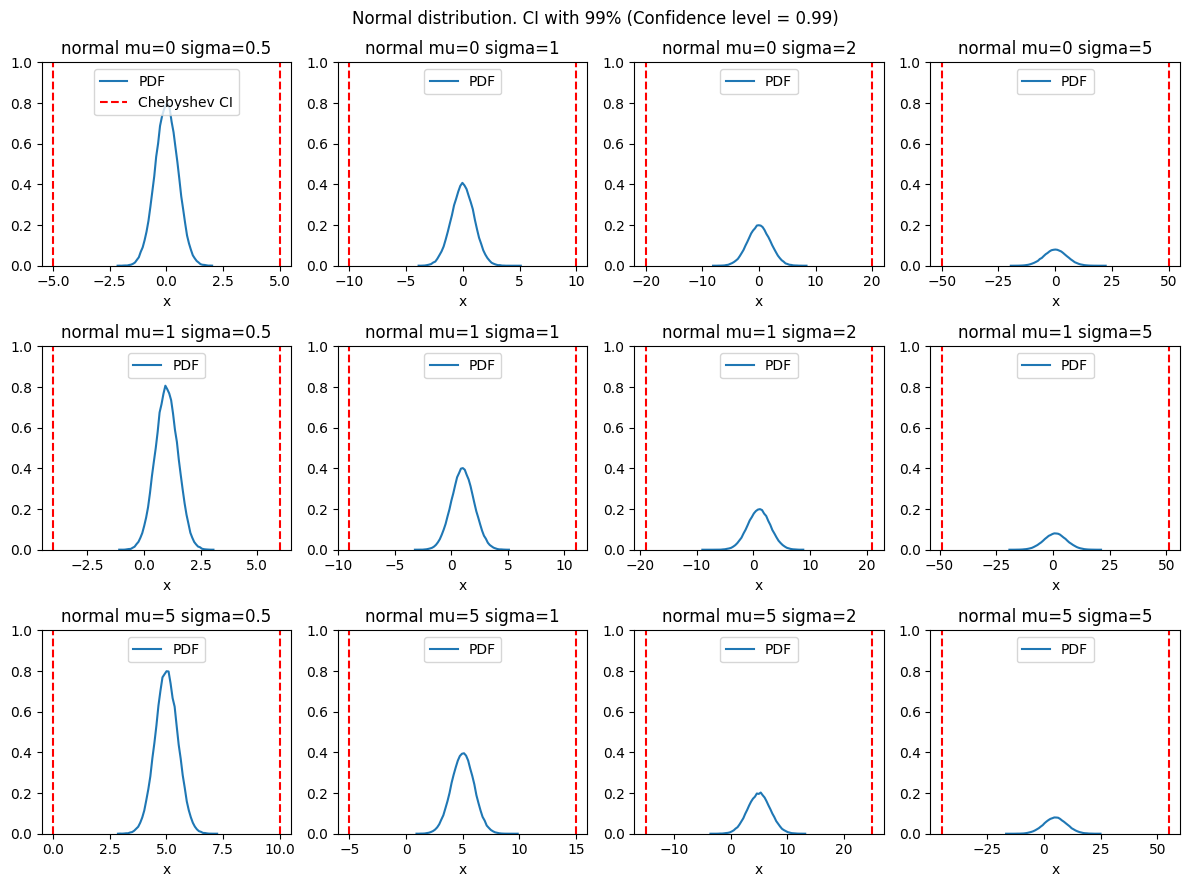

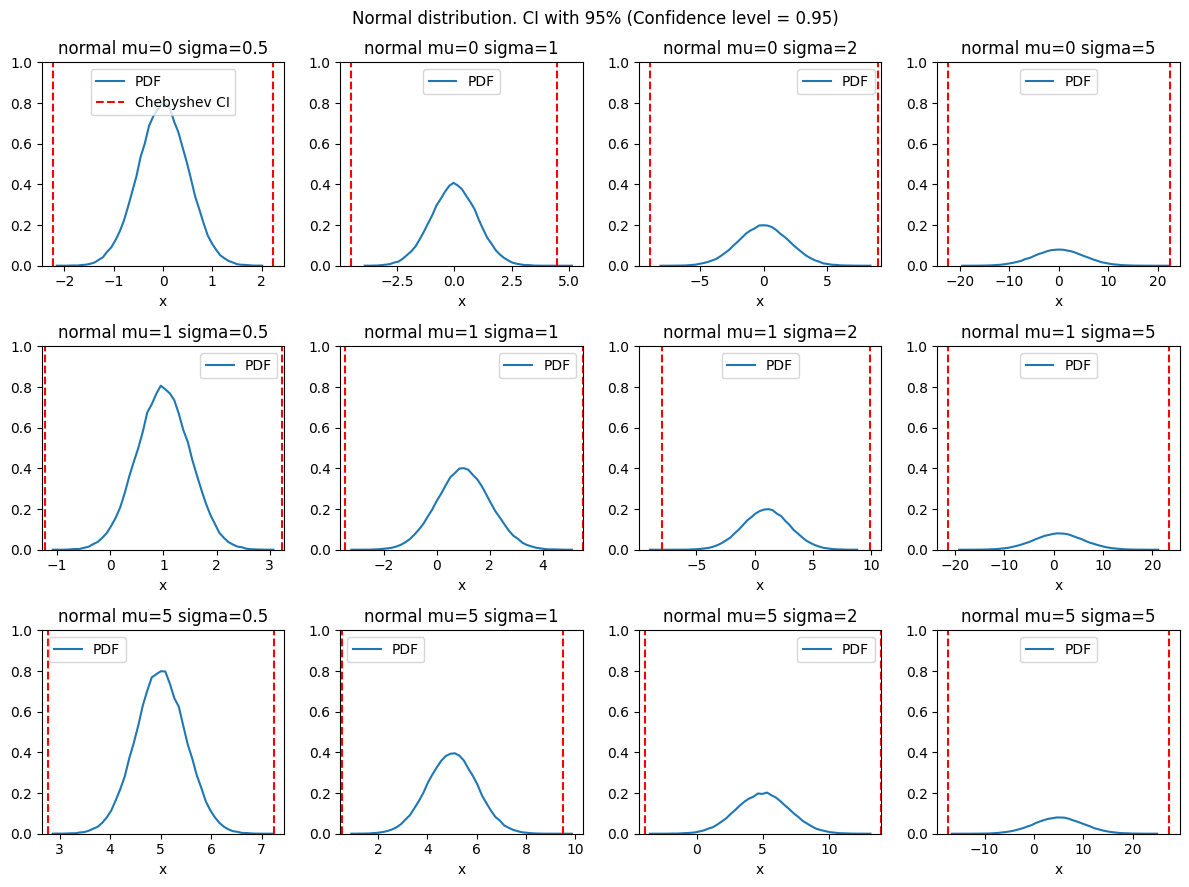

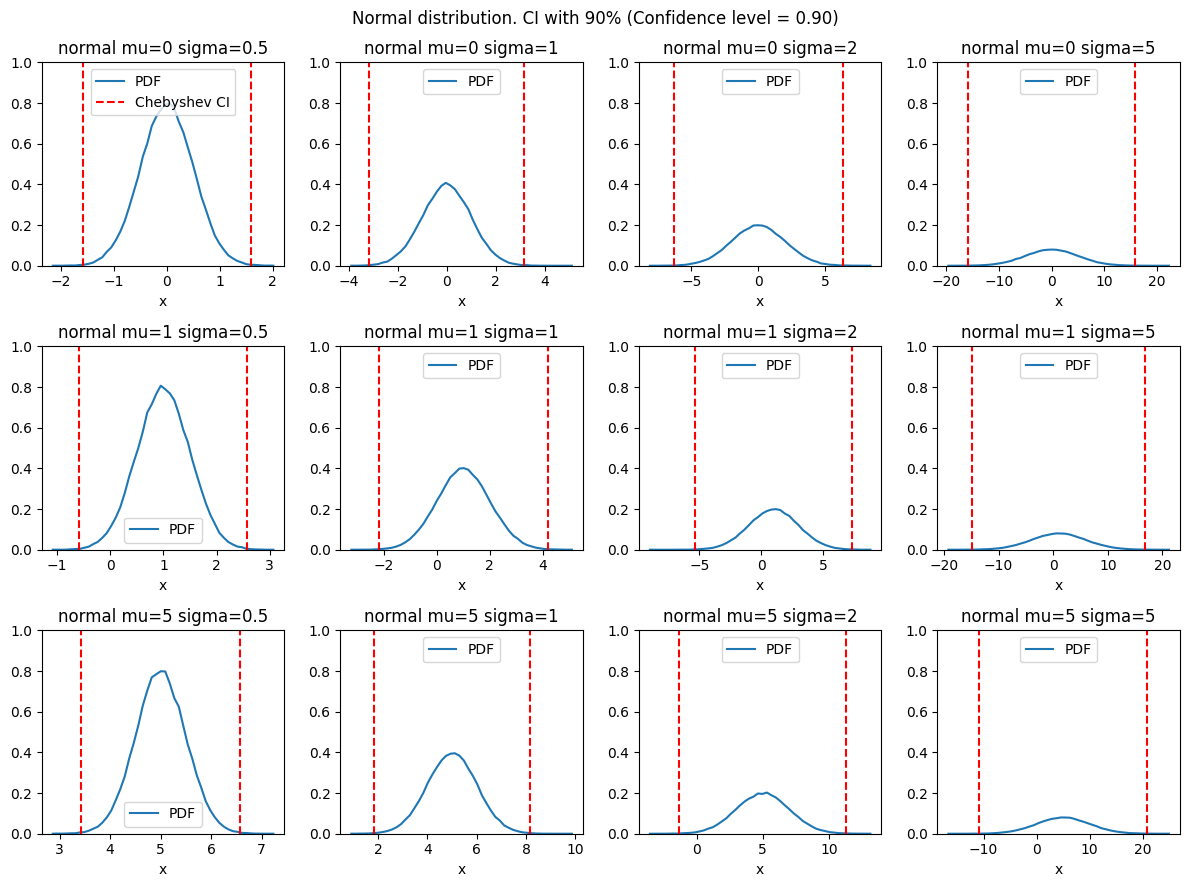

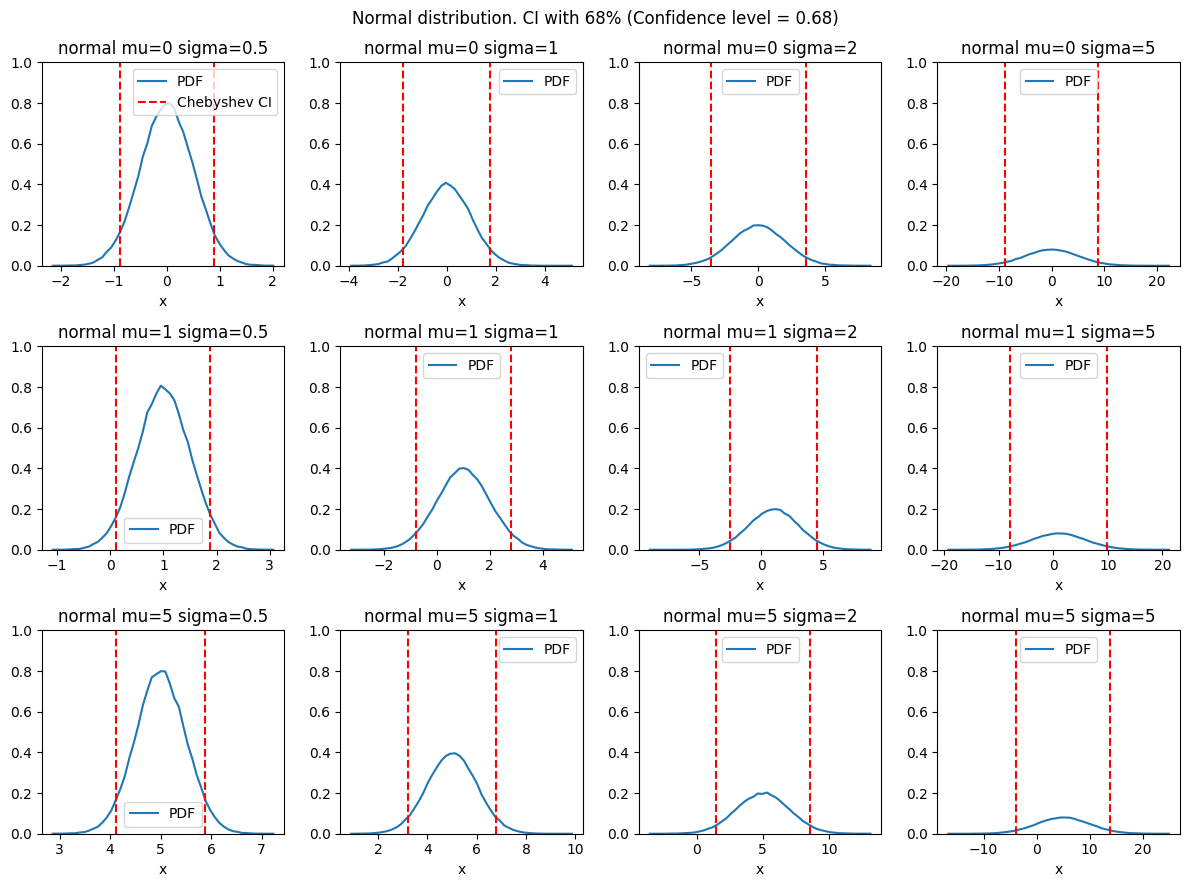

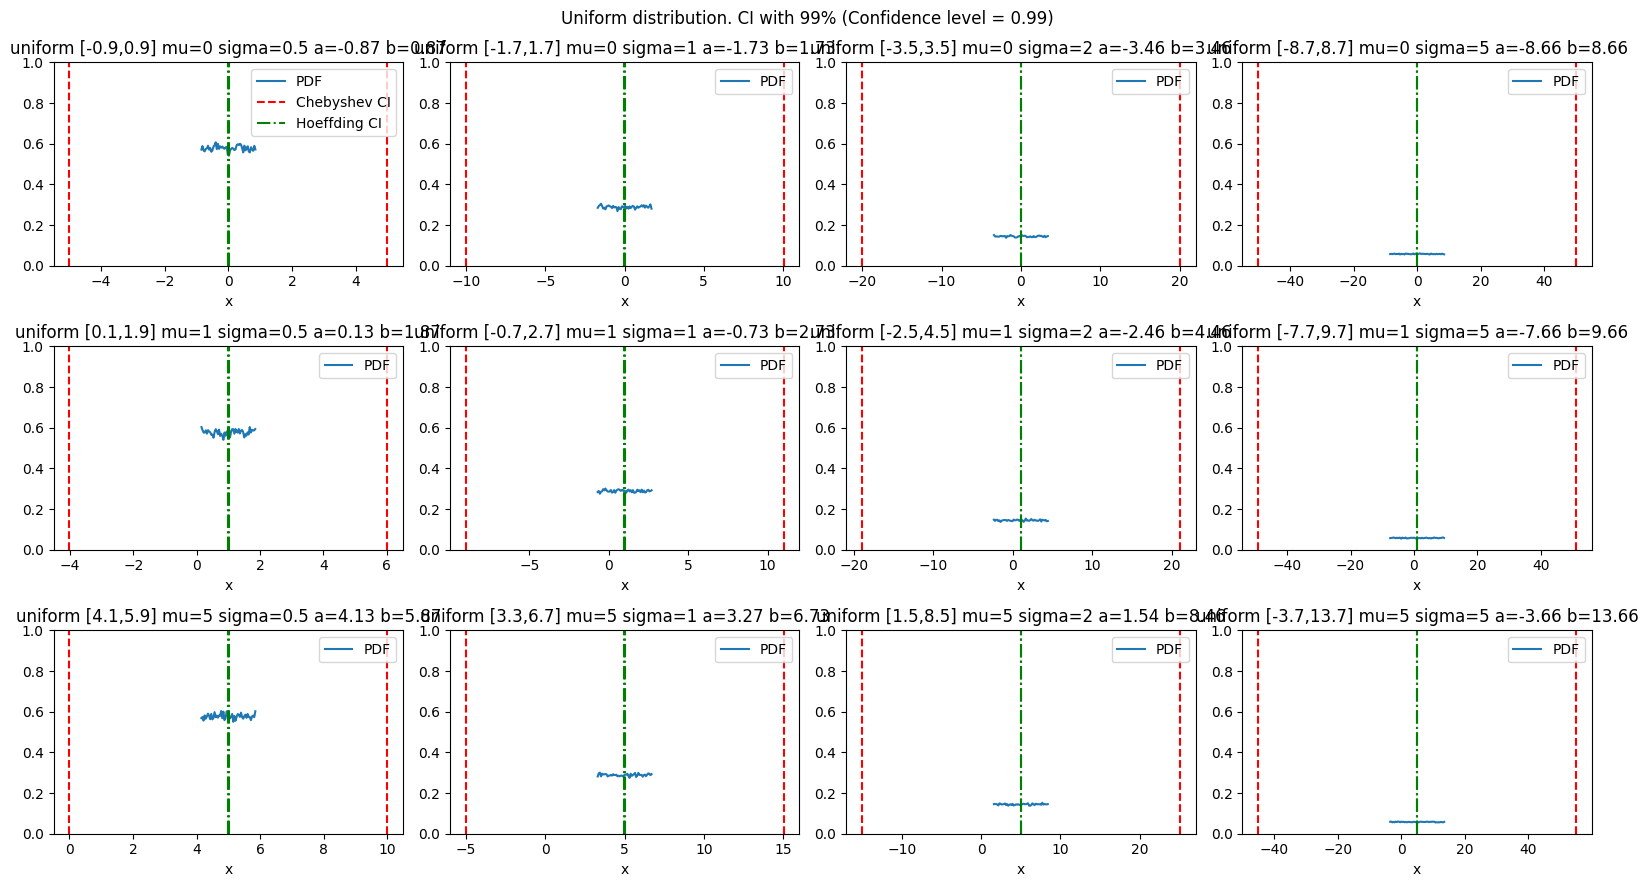

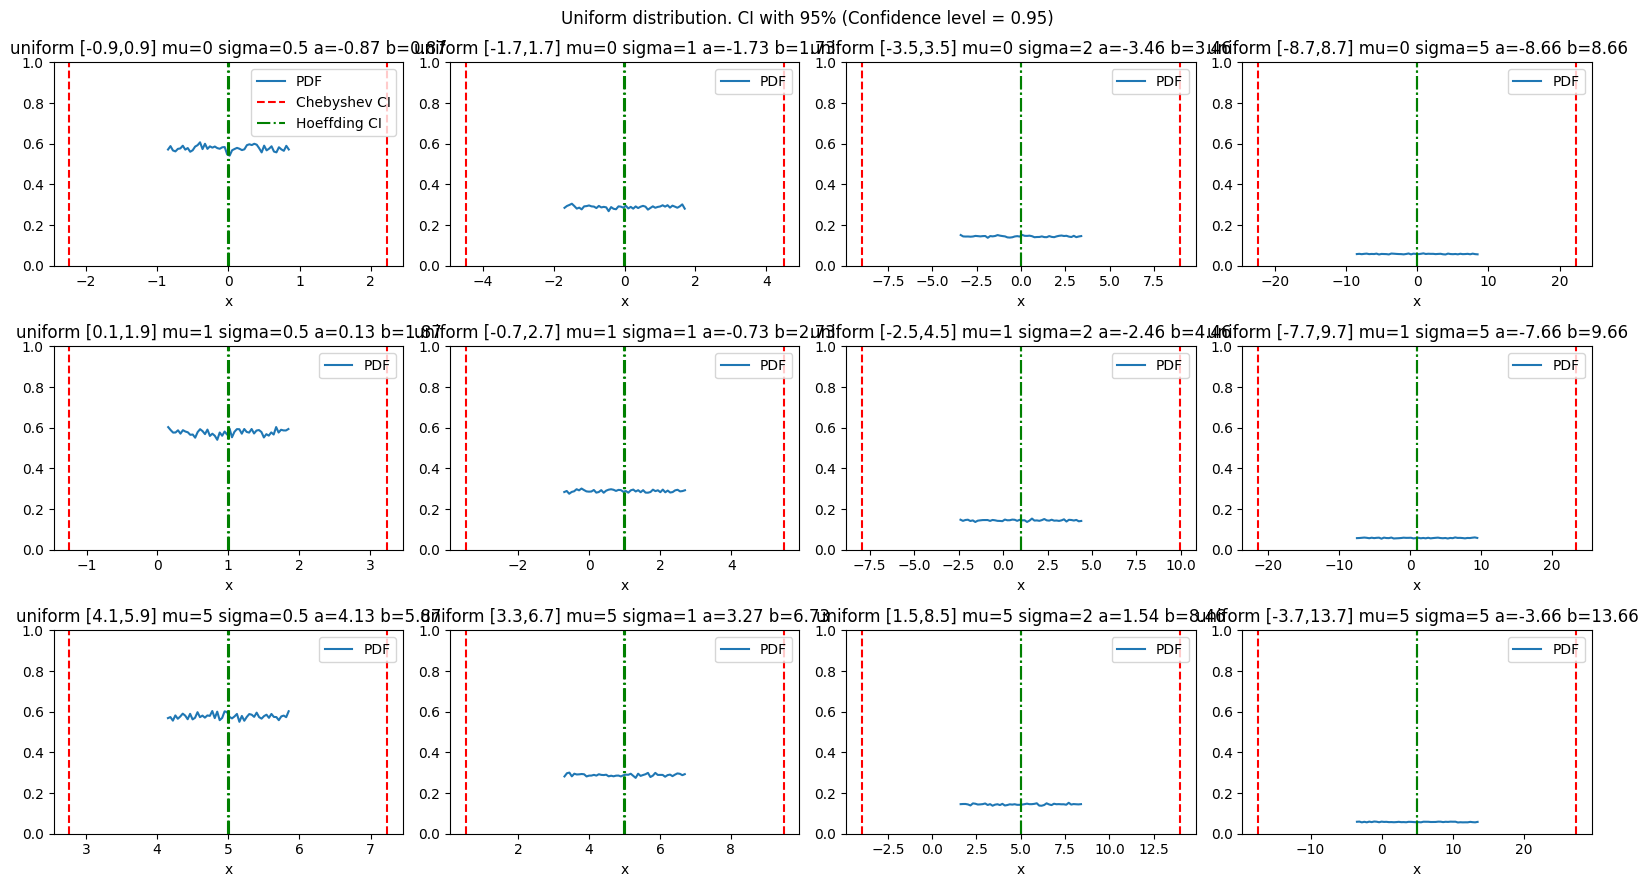

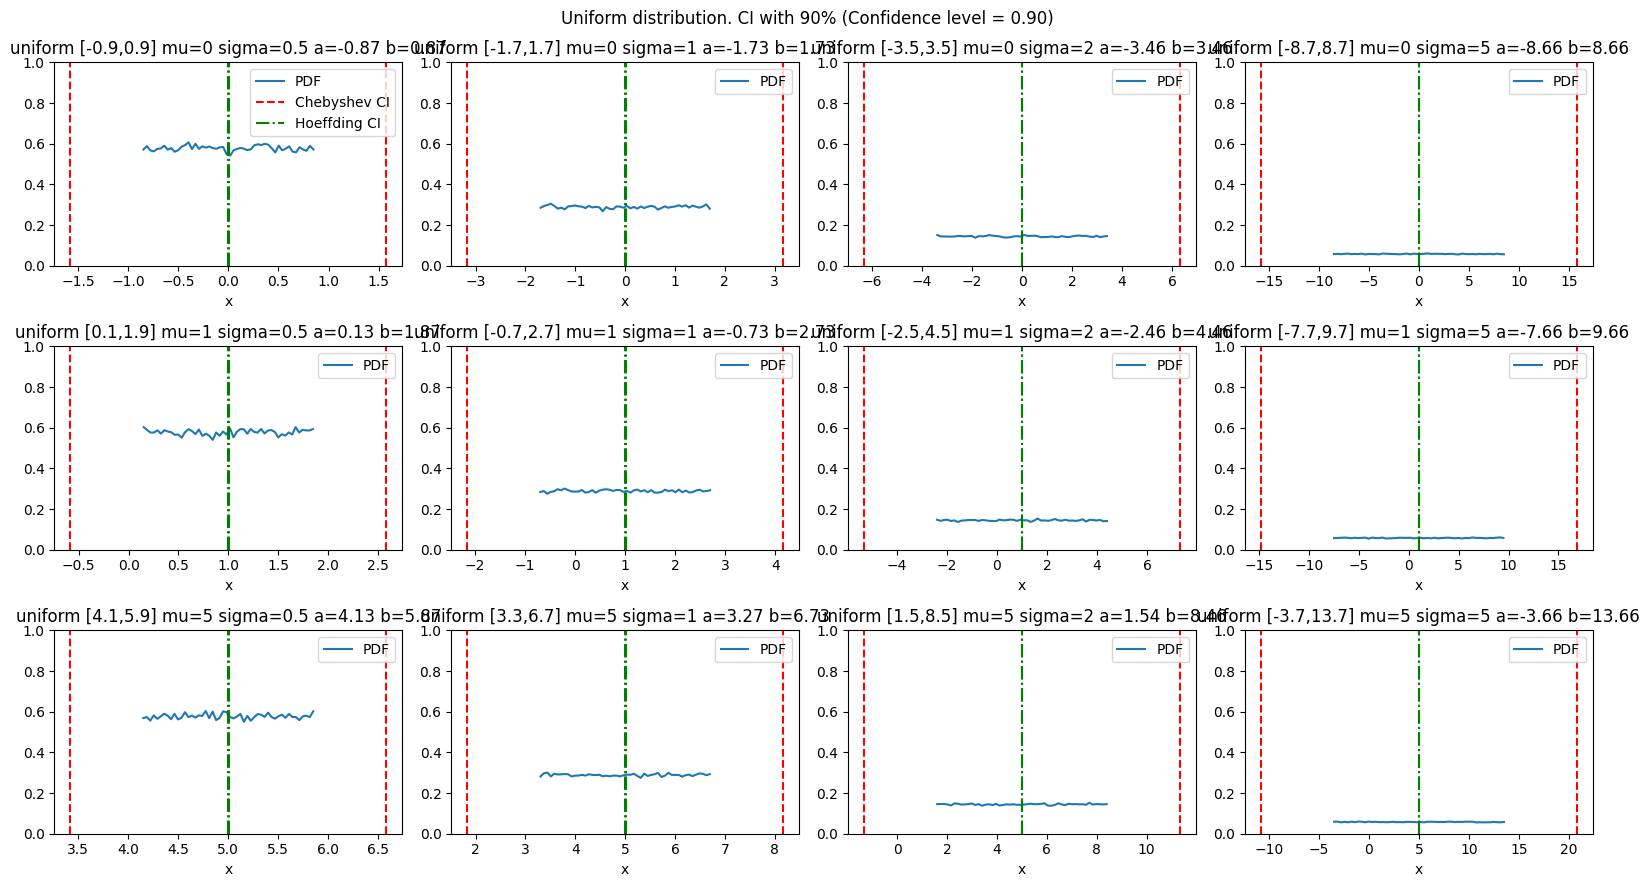

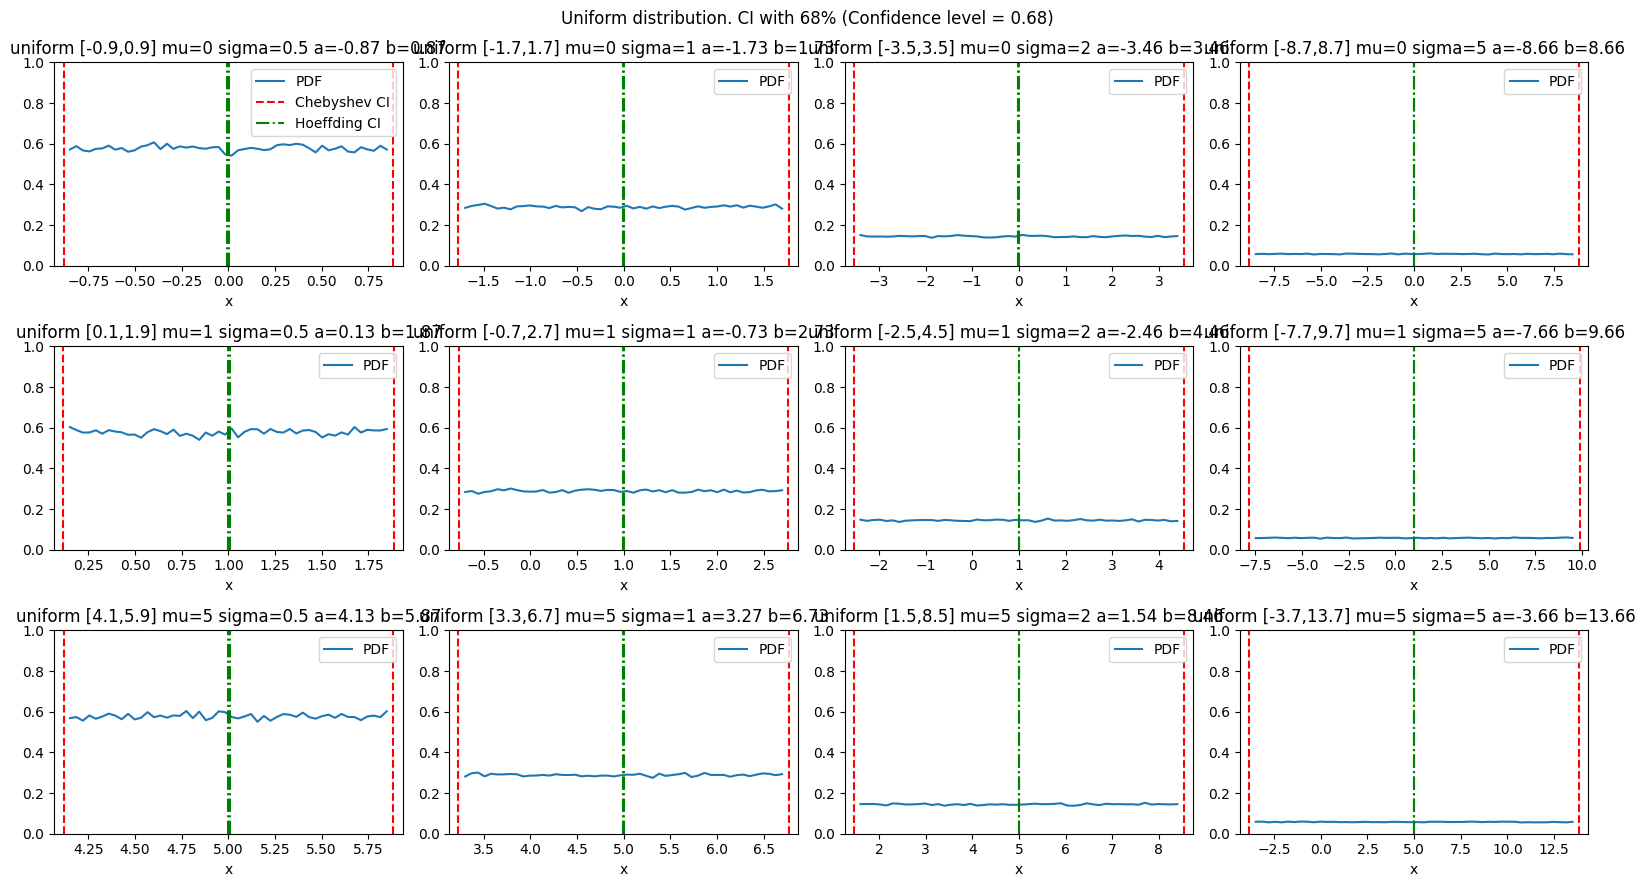

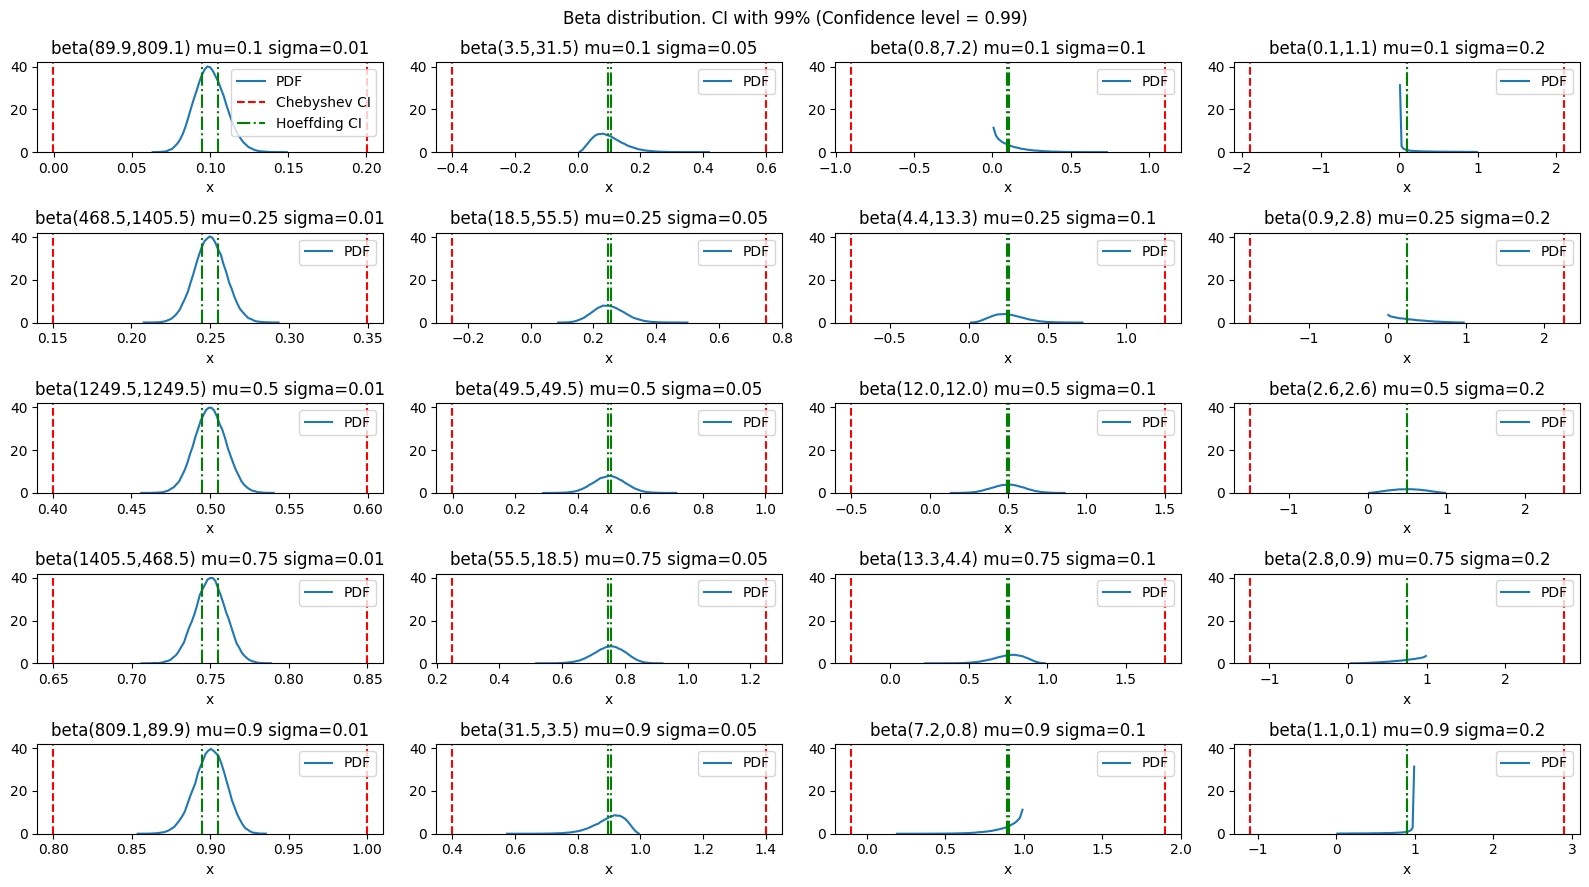

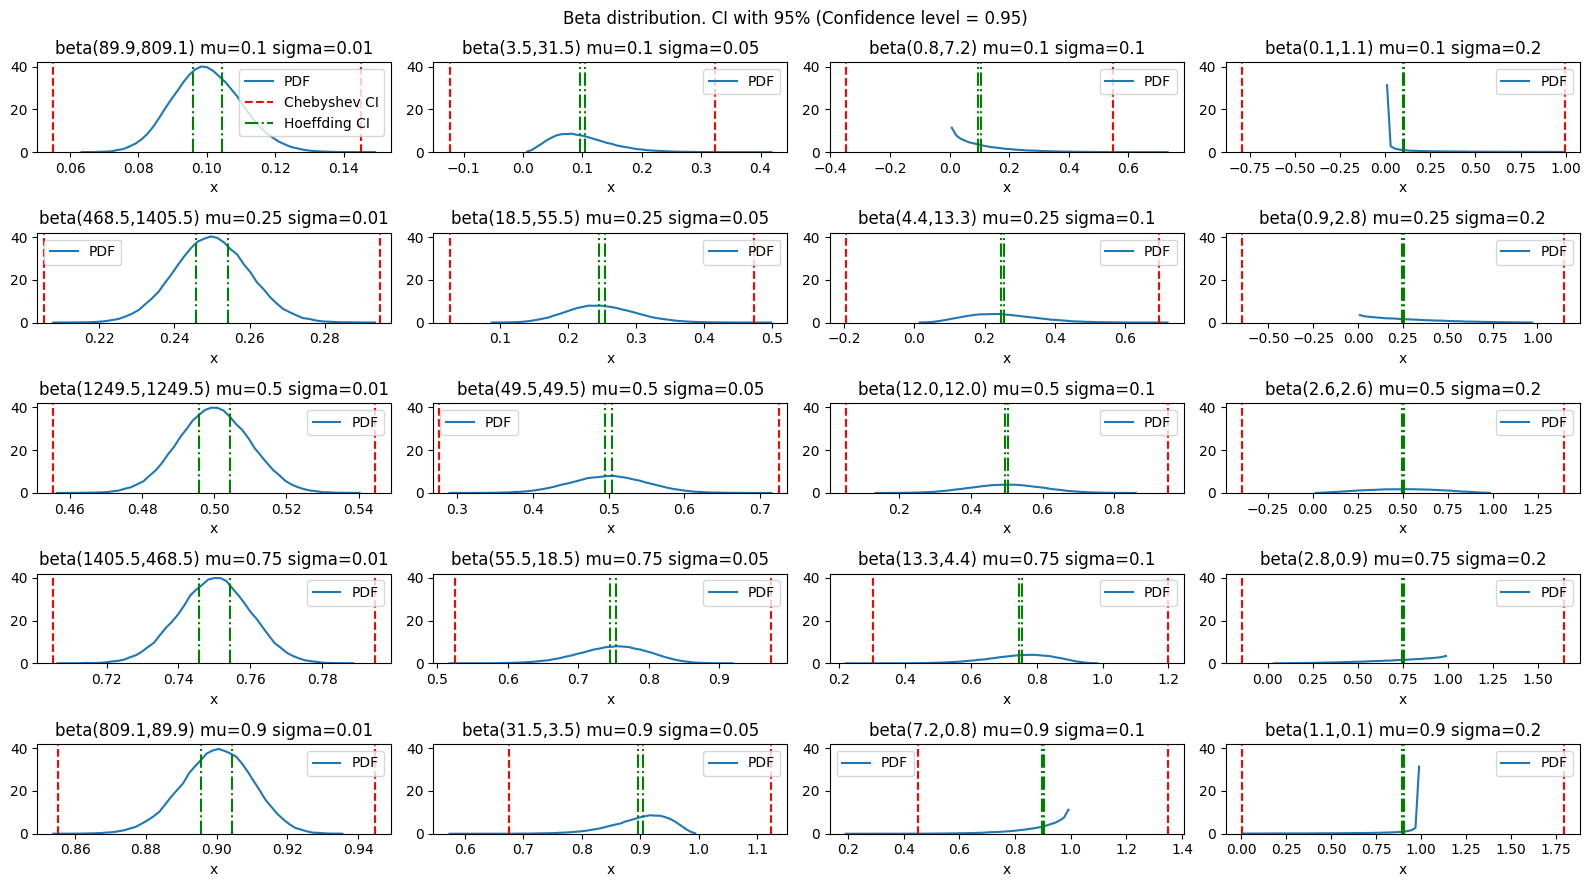

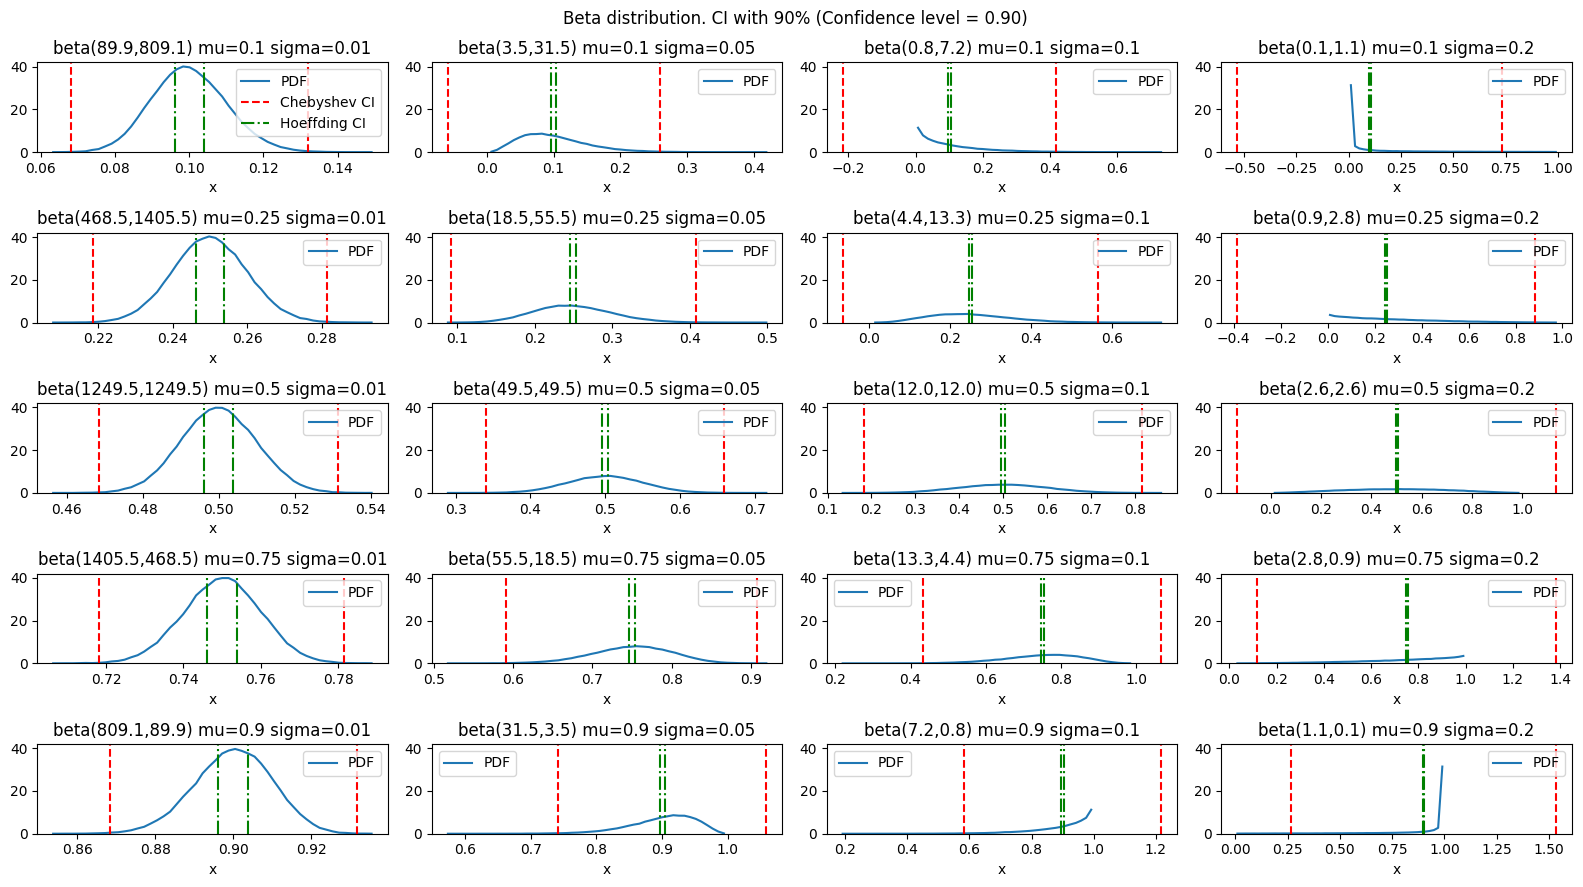

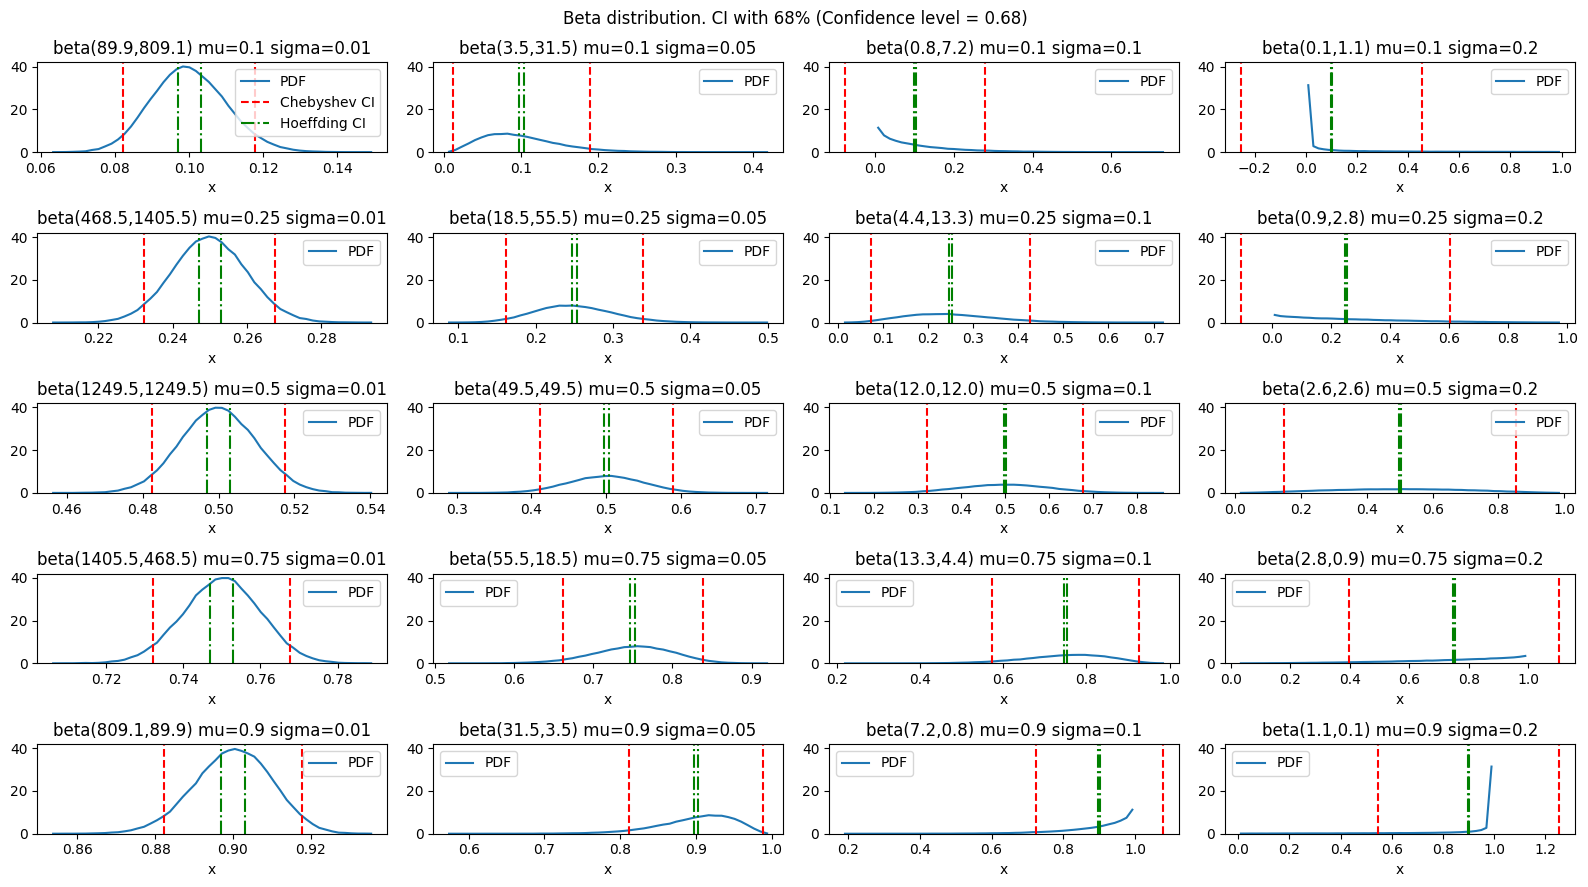

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

def chebyshev_interval(data, delta):
    """
    Chebyshev confidence interval for given confidence level (1 - delta).
    δ = 1/k^2  =>  k = 1/sqrt(δ)
    """
    mean = np.mean(data)
    std = np.std(data)
    k = 1 / np.sqrt(delta)
    return mean - k*std, mean + k*std

def hoeffding_interval(data, delta, a, b):
    """
    Corrected Hoeffding confidence interval for the population mean (mu).
    Requires the known theoretical bounds (a, b) of the population.
    """
    mean = np.mean(data)
    n = len(data)
    range_width = b - a # Use theoretical bounds
    # The half-width (epsilon) of the CI for the MEAN
    eps = range_width * np.sqrt(np.log(2/delta) / (2 * n)) 
    return mean - eps, mean + eps

def plot_columns(df, ncols, nrows, title, figsize=(12, 9), max_height=1, delta=0.05):
    """
    Plot histograms with Chebyshev and Hoeffding confidence intervals
    for a given confidence level (1 - delta). Legends show empirical coverage.
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.suptitle(f"{title} (Confidence level = {1-delta:.2f})")
    for i in range(nrows):
        for j in range(ncols):
            index = i*ncols + j
            if index >= len(df.columns):
                continue
            data = df[df.columns[index]]
            subtitle = df.columns[index]
            ax = axes[i, j]
            ax.set_title(subtitle)
            ax.set_xlabel("x")
            # histogram
            counts, bin_edges = np.histogram(data, bins=50, density=True)
            x = (bin_edges[:-1] + bin_edges[1:]) / 2
            ax.plot(x, counts, label="PDF")
            ax.set_ylim(0, max_height)

            # Chebyshev interval
            ci_cheb = chebyshev_interval(data, delta)
            ax.axvline(ci_cheb[0], color="red", linestyle="--", 
                       label=f"Chebyshev CI" if i==0 and j==0 else "")
            ax.axvline(ci_cheb[1], color="red", linestyle="--")

            # Hoeffding interval (only for bounded distributions)
            if "uniform" in subtitle or "beta" in subtitle:
                a = 0
                b = 1
                if "uniform" in subtitle:
                    name = df.columns[0]
                    pattern = r"a=([\d\.\-]+) b=([\d\.\-]+)"
                    match = re.search(pattern, name)
                    if match:
                        a_str = match.group(1)
                        b_str = match.group(2)
                        a = float(a_str)
                        b = float(b_str)                      
                ci_hoeff = hoeffding_interval(data, delta, a, b)
                ax.axvline(ci_hoeff[0], color="green", linestyle="-.", 
                           label=f"Hoeffding CI" if i==0 and j==0 else "")
                ax.axvline(ci_hoeff[1], color="green", linestyle="-.")

            ax.legend()
    plt.tight_layout()
    plt.show()

# Load data generated in data_generation.ipynb

input_file_path = "data_100000_100013059.csv"
df = pd.read_csv(input_file_path)

plot_columns(df.filter(like="normal", axis=1), 4, 3, "Normal distribution. CI with 99%", delta=0.01)
plot_columns(df.filter(like="normal", axis=1), 4, 3, "Normal distribution. CI with 95%", delta=0.05)
plot_columns(df.filter(like="normal", axis=1), 4, 3, "Normal distribution. CI with 90%", delta=0.10)
plot_columns(df.filter(like="normal", axis=1), 4, 3, "Normal distribution. CI with 68%", delta=0.32)
plot_columns(df.filter(like="uniform", axis=1), 4, 3, "Uniform distribution. CI with 99%", figsize=(16, 9), delta=0.01)
plot_columns(df.filter(like="uniform", axis=1), 4, 3, "Uniform distribution. CI with 95%", figsize=(16, 9), delta=0.05)
plot_columns(df.filter(like="uniform", axis=1), 4, 3, "Uniform distribution. CI with 90%", figsize=(16, 9), delta=0.10)
plot_columns(df.filter(like="uniform", axis=1), 4, 3, "Uniform distribution. CI with 68%", figsize=(16, 9), delta=0.32)
plot_columns(df.filter(like="beta", axis=1), 4, 5, "Beta distribution. CI with 99%", figsize=(16, 9), max_height=42, delta=0.01)
plot_columns(df.filter(like="beta", axis=1), 4, 5, "Beta distribution. CI with 95%", figsize=(16, 9), max_height=42, delta=0.05)
plot_columns(df.filter(like="beta", axis=1), 4, 5, "Beta distribution. CI with 90%", figsize=(16, 9), max_height=42, delta=0.10)
plot_columns(df.filter(like="beta", axis=1), 4, 5, "Beta distribution. CI with 68%", figsize=(16, 9), max_height=42, delta=0.32)

Chevishev is much more conservative than Hoeffding
Note that both Hoeffding and Chebyshev bounds are for the mean, not the individual values. So it is not expected to match the 68-95-99.7 rule, as this rule is for coverage of individual data points falling into the interval.